## Sequence similiarity

In [2]:
from Bio import pairwise2
from Bio import SeqIO
from Bio.SubsMat.MatrixInfo import *
import Bio.SubsMat.MatrixInfo
print('Available matrices:', Bio.SubsMat.MatrixInfo.available_matrices)
print('Which one would you like to use? Type [Enter] to use blosum62')
align_matr = input()
if align_matr == "":
    align_matr = "blosum62"
print(align_matr)
seq1 = SeqIO.read("/home/anton/programs/ncbi-blast-2.8.1+/bin/1.faa", "fasta")
seq2 = SeqIO.read("/home/anton/programs/ncbi-blast-2.8.1+/bin/2.faa", "fasta")
alignments = pairwise2.align.globalds(seq1.seq, seq2.seq, blosum62, -10, -0.5)
alignments_id = pairwise2.align.globalms(seq1.seq, seq2.seq, 1, 0, 0, 0)
print("Number of alignments = " + str(len(alignments)))
print(pairwise2.format_alignment(*alignments[0]))
print("Similiarity = " + str(alignments[0][2]))
print("Identity = " + str(alignments_id[0][2]).split('.')[0])

Available matrices: ['benner6', 'benner22', 'benner74', 'blosum100', 'blosum30', 'blosum35', 'blosum40', 'blosum45', 'blosum50', 'blosum55', 'blosum60', 'blosum62', 'blosum65', 'blosum70', 'blosum75', 'blosum80', 'blosum85', 'blosum90', 'blosum95', 'feng', 'fitch', 'genetic', 'gonnet', 'grant', 'ident', 'johnson', 'levin', 'mclach', 'miyata', 'nwsgappep', 'pam120', 'pam180', 'pam250', 'pam30', 'pam300', 'pam60', 'pam90', 'rao', 'risler', 'structure']
Which one would you like to use? Type [Enter] to use blosum62

blosum62
Number of alignments = 1
TTCCGGTTCCGGAA--
  ||||||||||||  
--CCGGTTCCGGAATT
  Score=57

Similiarity = 57.0
Identity = 12


In [9]:
import Bio.SubsMat.MatrixInfo
print(dir(Bio.SubsMat.MatrixInfo))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'available_matrices', 'benner22', 'benner6', 'benner74', 'blosum100', 'blosum30', 'blosum35', 'blosum40', 'blosum45', 'blosum50', 'blosum55', 'blosum60', 'blosum62', 'blosum65', 'blosum70', 'blosum75', 'blosum80', 'blosum85', 'blosum90', 'blosum95', 'feng', 'fitch', 'genetic', 'gonnet', 'grant', 'ident', 'johnson', 'levin', 'mclach', 'miyata', 'nwsgappep', 'pam120', 'pam180', 'pam250', 'pam30', 'pam300', 'pam60', 'pam90', 'rao', 'risler', 'structure']


## NDC

In [1]:
import numpy as np
import requests
import os
#import pygtop # API for IUPHAR
import datetime
import zipfile
import csv
import json
import pandas as pd

In [1]:


#def json_change_field(param_file, field, value_new):
    
param_file = 'param.json'
fda_folder = '/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA'
try:  
    os.mkdir(os.path.join(fda_folder, "Data"))
except OSError:  
    print ("Directory %s failed (maybe exists)" % fda_folder)
else:  
    print ("Successfully created the directory %s " % fda_folder)
    
with open(os.path.join(fda_folder, param_file), "r") as f:
    param_data = json.load(f)
    ndc_date = param_data["ndc_last_updated"] #in future - from file
URL_1 = "https://api.fda.gov/drug/ndc.json"
ndc_data = requests.get(URL_1).json()
ndc_date_new = ndc_data["meta"]["last_updated"]
ndc_file = 'drug-ndc-0001-of-0001.json'
if ndc_date != ndc_date_new:     
    url_file = "https://download.open.fda.gov/drug/ndc/drug-ndc-0001-of-0001.json.zip"

    r = requests.get(url_file, allow_redirects=True)
    fda_path =  os.path.join(fda_folder, url_file.split('/')[-1])
    print("Downloading " + url_file.split("/")[-1])
    open(fda_path, 'wb').write(r.content)

    with zipfile.ZipFile(fda_path, 'r') as zip_ref:
        print("Extracting " + url_file.split("/")[-1])
        zip_ref.extractall(fda_folder)
    try:
        os.remove(fda_path)
    except:
        print("Error while deleting file ", fda_path)
    print("NDC downloaded, last update {ndc_date_new}".format(ndc_date_new=ndc_date_new))

    with open(os.path.join(fda_folder, param_file)) as f:
        param_data = json.load(f)
        param_data["ndc_last_updated"] = ndc_date_new
        with open(os.path.join(fda_folder, param_file), "w") as jsonFile:
            json.dump(param_data, jsonFile)

Directory /media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA failed (maybe exists)


In [17]:
drugs = pd.read_csv("/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA/Data/unii_inchikey.csv", sep=',', lineterminator='\n', header=0)

In [3]:
fda_folder = '/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA'
ndc_file = 'drug-ndc-0001-of-0001.json'
with open(os.path.join(fda_folder, ndc_file), "r") as f:
    ndc_data = json.load(f)

k = 0
non = 0
lst = []
for res in ndc_data['results']:
    k += 1
    if 'unii' not in res['openfda']:
       # print("None")
        non += 1
        continue
    for item in res['openfda']['unii']:
        if len(res['openfda']['unii']) == 1:
            if (item not in lst) and (item not in drugs['unii']):
                lst.append(item)
    #if k == 100:
      #  break

In [23]:
print(len(lst))
print(len(drugs["unii"]))
#print(len(lst1))
print(non)

3187
1793
29392


In [6]:

fda_folder = '/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA'
try:  
    os.mkdir(os.path.join(fda_folder, "Data"))
except OSError:
    pass #print ("Directory %s failed (maybe exists)" % fda_folder)
else:  
    print ("Successfully created the directory %s " % fda_folder)

#DOWNLOADING UNII TABLE

url_file = "https://fdasis.nlm.nih.gov/srs/download/srs/UNII_Data.zip"

r = requests.get(url_file, allow_redirects=True)
fda_path =  os.path.join(fda_folder, url_file.split('/')[-1])
print("Downloading " + url_file.split("/")[-1])
open(fda_path, 'wb').write(r.content)

unii = ''
with zipfile.ZipFile(fda_path, 'r') as zip_ref:
    names = zip_ref.namelist()
    print("Extracting " + url_file.split("/")[-1])
    zip_ref.extractall(os.path.join(fda_folder, "Data"))
    for name in names:
        if name[0:4] == "UNII":
            unii = name
            unii_date = name.split(" ")[-1].split(".")[0] # in future - to file
            print("UNII date = {unii_date}".format(unii_date=unii_date))
try:
    os.remove(fda_path)
except:
    print("Error while deleting file ", fda_path)
print("UNII table updated")


Extracting UNII_Data.zip
UNII date = 25Oct2018
UNII table updated


In [13]:
iuphar_drugs = pd.read_csv("/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA/Data/iuphar_unii_inchikey.csv", sep=',', lineterminator='\n', header=0)
iuphar_drugs_list = iuphar_drugs['inchikey'].values.tolist()

In [12]:
drugbank_unii = pd.read_csv("/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/BACHELOR/drugbank_unii.csv", sep=',', lineterminator='\n', header=0)
drugbank_unii_list = drugbank_unii['unii'].values.tolist()

In [21]:
found = []
for index, row in drugs.iterrows():
    if not (row['inchikey'] in iuphar_drugs_list):
        if row['unii'] in drugbank_unii_list:
            found.append(row['unii'])

In [23]:
print(len(found))
df = pd.DataFrame({"unii" : found})
df.to_csv(os.path.join("/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/BACHELOR", "found_drugbank.csv"), index=False)

1037


In [2]:
import pandas as pd
#from chembl_webresource_client.new_client import new_client
import pubchempy as pcp

unii_path = os.path.join(fda_folder, "Data", name)
unii_table = pd.read_csv(unii_path, sep='\t', lineterminator='\n')
print(len(unii_table))
no = 0
no_s = 0
s = 0
i = 0
p = 0
no_unii = 0
unii_inchikey = [[],[]]

for unii in lst:
    inchikey = drugs.loc[drugs['unii'] == unii]['inchikey']
    if inchhikey.empty:
        row1 = iuphar_drugs.loc[iuphar_drugs['inchikey'] == inchikey]
    if not row1.empty:
        continue
    row = unii_table.loc[unii_table['UNII'] == unii]
    if row.empty:
        no_unii += 1
    else:
        if pd.isna(row['INCHIKEY'].iloc[0]):
            if pd.isna(row['PUBCHEM'].iloc[0]):
                """
                if not pd.isna(row['SMILES'].iloc[0]):
                    #print("P = {str}".format(str=row['SMILES']))
                    molecule = new_client.molecule
                    try:
                        res = molecule.filter(molecule_structures__canonical_smiles__flexmatch=row['SMILES'].iloc[0])
                    except:
                        # Inchi key was not found in ChEMBL
                        bad_keys.append(row['SMILES'].iloc[0])
                    #print("S")                
                    if len(res) == 0:
                        #print("Drug doesn't have id, its smiles wasn't found in ChEMBL")
                        no_s += 1
                    else:
                        s += 1
                        #for item in res:
                        inchi = res[0]['molecule_structures']['standard_inchi'].split("=")[1]
                else:
                    #print("Drug doesn't have id")
                    """
                no += 1
            else:
                #print("S = {str}".format(str=row['PUBCHEM']))       
                cid = int(row['PUBCHEM'].iloc[0])
                c = pcp.Compound.from_cid(cid)
                dict_c = c.to_dict(properties=["inchikey"])
                inchikey = dict_c["inchikey"]
                #print("P")
                #inchi = dict_c["inchi"].split("=")[1]
                p += 1
                unii_inchikey[0].append(unii)
                unii_inchikey[1].append(inchikey)
        else:
            inchikey = row['INCHIKEY'].iloc[0]
            i += 1
            unii_inchikey[0].append(unii)
            unii_inchikey[1].append(inchikey)

IndentationError: expected an indented block (<ipython-input-2-beb1a51f457a>, line 19)

In [25]:

print(no_unii, no, no_s, s, p, i)
print(no + no_s + s + p + i + no_unii)
print(len(unii_inchikey[1]))

#pd.DataFrame(unii_inchi).to_csv(os.path.join(fda_folder, "Data", "unii_inchi.csv"))

(0, 1392, 0, 0, 227, 1568)
3187
1795


In [ ]:
print(no, no_s, s, p, i)
2132 17 57 237 1737
4180

In [22]:
df = pd.DataFrame({"unii" : unii_inchikey[0], "inchikey" : unii_inchikey[1]})
df.to_csv(os.path.join(fda_folder, "Data", "other_unii_inchikey.csv"), index=False)


In [26]:
import pandas as pd
a = pd.read_csv("/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/FDA/Data/unii_inchikey.csv", sep=',', lineterminator='\n', header=0)

In [27]:
print(a["unii"])

0       0J48LPH2TH
1       E7199S1YWR
2       786Z46389E
3       B53E3NMY5C
4       LX1OH63030
5       Q3JTX2Q7TU
6       207LT9J9OC
7       8VZV102JFY
8       3ST302B24A
9       3M8608UQ61
10      4AF302ESOS
11      5U85DBW7LO
12      AGG2FN16EV
13      57GNO57U7G
14      5968Y6H45M
15      2W4A77YPAN
16      6GNT3Y5LMF
17      6CW7F3G59X
18      BK76465IHM
19      OLH94387TE
20      660YQ98I10
21      9N7R477WCK
22      00FN6IH15D
23      6KY687524K
24      YHP6YLT61T
25      3I3T11UD2S
26      FD171B778Y
27      6W15Z5R0RU
28      9O25354EPJ
29      33CM23913M
           ...    
1763    75L57R6X36
1764    IYD54XEG3W
1765    KB1PCR9DMW
1766    JED5K35YGL
1767    95OOS7VE0Y
1768    TU7HW0W0QT
1769    U9LY9Y75X2
1770    Z9K9Y9WMVL
1771    M487QF2F4V
1772    9013DUQ28K
1773    N0TXR0XR5X
1774    YOW8V9698H
1775    31Q44514JV
1776    SOA12P041N
1777    93T0T9GKNU
1778    J7A92W69L7
1779    L0ND3981AG
1780    IS1UP79R56
1781    5RZZ0Z1GJT
1782    6326W0DRHY
1783    2XLN4Y044H
1784    QMG7

In [16]:
iuphar_path = "/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/BACHELOR/iuphar"
import os
lig_iuphar = pd.read_csv(os.path.join(iuphar_path, "ligands.csv"), sep=',', lineterminator='\n')
inter_iuphar = pd.read_csv(os.path.join(iuphar_path, "interactions.csv"), sep=',', lineterminator='\n')
no_inchi = 0
inchi = "ZCCUWMICIWSJIX-NQJJCJBVSA-N"
print(lig_iuphar.loc[lig_iuphar['InChIKey'] == inchi])

Empty DataFrame
Columns: [Ligand id, Name, Species, Type, Approved, Withdrawn, Labelled, Radioactive, PubChem SID, PubChem CID, UniProt id, IUPAC name, INN, Synonyms, SMILES, InChIKey, InChI, GtoImmuPdb, GtoMPdb]
Index: []


In [30]:
iuphar_path = "/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/BACHELOR/iuphar"
import os
lig_iuphar = pd.read_csv(os.path.join(iuphar_path, "ligands.csv"), sep=',', lineterminator='\n')
inter_iuphar = pd.read_csv(os.path.join(iuphar_path, "interactions.csv"), sep=',', lineterminator='\n')
no_inchi = 0
targets_iuphar = [[],[]]
inchi_iuphar = []
for inchi in a["inchikey"]:
    row = lig_iuphar.loc[lig_iuphar['InChIKey'] == inchi]
    #row = lig_iuphar.loc[lig_iuphar['InChI'] == "InChI=" + inchi]
    if row.empty:
        no_inchi += 1
        targets_iuphar.append(None)
    else:
        inchi_iuphar.append(inchi)
        lig_id = row['Ligand id'].iloc[0]
        row_arr = inter_iuphar.loc[inter_iuphar["ligand_id"] == lig_id]
        targ_arr = [[],[]]
        for row_1 in row_arr["target"]:
            targ_arr[0].append(row_1)
        for row_1 in row_arr["type"]:
            targ_arr[1].append(row_1)    
        for i in range(2):
            targets_iuphar[i].append(targ_arr[i])
print(len(targets_iuphar[0]))

525


In [37]:
print(len(inchi_iuphar))
df = pd.DataFrame({"inchikey" : inchi_iuphar})
df.to_csv(os.path.join(fda_folder, "Data", "iuphar_unii_inchikey.csv"), index=False)

525


In [27]:
#print(targets_iuphar[0])
#print(targets_iuphar[1])
b = []
for row in targets_iuphar[1]:
    for el in row:
        b.append(el)
print(set(b))
from collections import Counter

print(Counter(b).values())
types = dict(zip(b, Counter(b).values()))
print(types)
print(sum(Counter(b).values()))

set(['None', 'Allosteric modulator', 'Subunit-specific', 'Agonist', 'Gating inhibitor', 'Channel blocker', 'Activator', 'Inhibitor', 'Antagonist'])
[10, 41, 4, 366, 24, 93, 104, 404, 320]
{'Activator': 41, 'Allosteric modulator': 24, 'Inhibitor': 320, 'Antagonist': 404}
1366


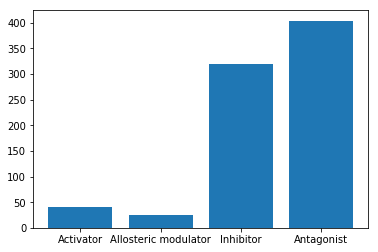

In [37]:
import matplotlib.pyplot as plt
names = list(types.keys())
values = list(types.values())

fig, ax = plt.subplots()
ax.bar(names, values)
plt.show()

In [17]:
print(len(targets_iuphar[0]))
print(len(targets_iuphar[1]))
#lig_iuphar = []
#for row in targets_iuphar[0]:
#    lig_iuphar.append()

525
525


In [19]:
print(len(set(inter_iuphar["target_id"])))
print(len(set(inter_iuphar["ligand_id"])))

2031
8027


SyntaxError: invalid syntax (<ipython-input-29-4845e2f4a750>, line 1)

In [10]:

iuphar_path = "/media/anton/b8150e49-6ff0-467b-ad66-40347e8bb188/anton/BACHELOR/iuphar"
import os
pep_iuphar = pd.read_csv(os.path.join(iuphar_path, "peptides.csv"), sep=',', lineterminator='\n')
inter_iuphar = pd.read_csv(os.path.join(iuphar_path, "interactions.csv"), sep=',', lineterminator='\n')
no_inchi = 0
targets_iuphar = [[],[]]
for inchi in a["inchikey"]:
    row = pep_iuphar.loc[pep_iuphar['InChIKey'] == inchi]
    #row = lig_iuphar.loc[lig_iuphar['InChI'] == "InChI=" + inchi]
    if row.empty:
        no_inchi += 1
        targets_iuphar.append(None)
    else:
        lig_id = row['Ligand id'].iloc[0]
        row_arr = inter_iuphar.loc[inter_iuphar["ligand_id"] == lig_id]
        targ_arr = [[],[]]
        for row_1 in row_arr["target"]:
            targ_arr[0].append(row_1)
        for row_1 in row_arr["type"]:
            targ_arr[1].append(row_1)    
        for i in range(2):
            targets_iuphar[i].append(targ_arr[i])
print(len(targets_iuphar[0]))



11
